In [ ]:
#pip install opencv-contrib-python-headless

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import urllib
%matplotlib inline

In [2]:
!wget  "https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg" -O imagen.jpg
image = cv2.imread('imagen.jpg')
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

--2020-09-01 12:09:10--  https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57550 (56K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>]  56.20K  --.-KB/s    in 0.06s   

2020-09-01 12:09:10 (884 KB/s) - ‘imagen.jpg’ saved [57550/57550]



In [3]:
img.shape #Número de pixeles por capa RGB

(300, 400, 3)

In [4]:
#img

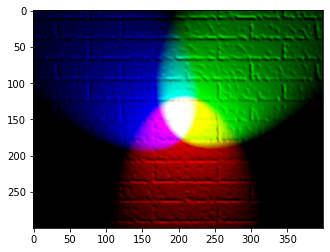

In [5]:
plt.imshow(img)
plt.show()

In [6]:
print(img[100,100,0]) #R
print(img[100,100,1]) #G
print(img[100,100,2]) #B

0
0
124


In [7]:
r = img.copy()
# rojos
r[:, :, 1] = 0
r[:, :, 2] = 0


g = img.copy()
# verdes
g[:, :, 0] = 0
g[:, :, 2] = 0

b = img.copy()
# azules
b[:, :, 0] = 0
b[:, :, 1] = 0

In [8]:
r.shape

(300, 400, 3)

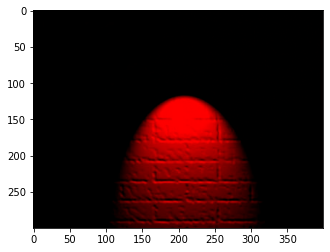

In [9]:
# RGG
plt.imshow(r)
plt.show()

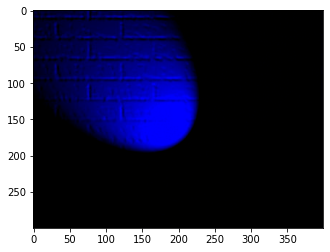

In [10]:
plt.imshow(b)
plt.show()

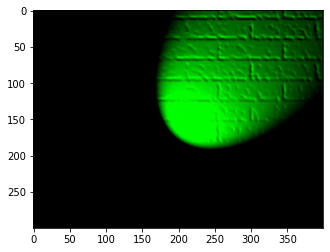

In [11]:
plt.imshow(g)
plt.show()

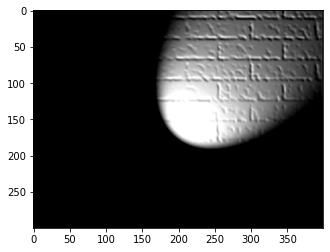

In [13]:
# Obtener los tres canales de la imagen
r,g,b = cv2.split(img,)
plt.imshow(g, cmap="gray")

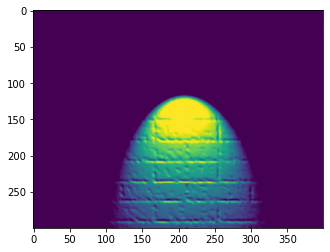

In [14]:
plt.imshow(r)

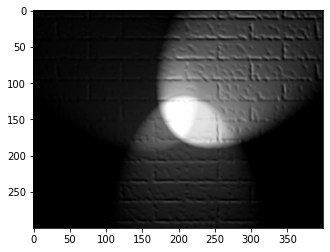

In [15]:
#Escala de grises

grises = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(grises, cmap="binary_r")
plt.show()

Dimensiones :  (6, 8, 3)


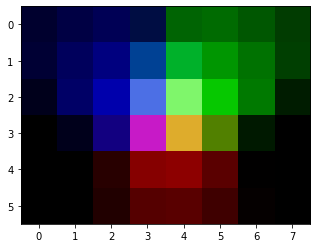

In [18]:
#Reducir escala

escala = 2 # reducir al 10 porciento la imagen original 
width = int(img.shape[1] * escala / 100)
height = int(img.shape[0] * escala / 100)
dim = (width, height)
reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Dimensiones : ',reduccion.shape)
 
plt.imshow(reduccion)
plt.show()

aumento :  (3000, 4000, 3)


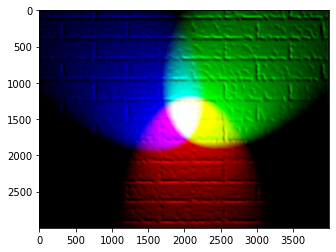

In [19]:
#Aumentar escala

escala = 1000 #porciento
width = int(img.shape[1] * escala / 100)
height = int(img.shape[0] * escala / 100)
dim = (width, height)
reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('aumento : ',reduccion.shape)
plt.imshow(reduccion) 
plt.show()

In [20]:
img.shape

(300, 400, 3)

In [21]:
!wget  "https://steemitimages.com/p/2Snpznz7rwiEvm3BWv4WV6UQZYXRFp9CJu7zBSmrCn5HwcKbmC3X1BQ8BxVdqFxPu6Dp6ttoKfRR9nPJ2VupcVut2emac7TheixzfZumguHdBp7BBRGQyzafdeFL76SJTtfDQXjq6Tv24uGLogiNQ3AkSTGughcpVi1Hbie6BAXVbKmKxyepJvbhbEdhMEmqsDR8LrJPAxVs92bjvWJ?format=match&mode=fit&width=1280" -O imagen.jpg
img2 = cv2.imread("imagen.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


--2020-09-01 12:20:47--  https://steemitimages.com/p/2Snpznz7rwiEvm3BWv4WV6UQZYXRFp9CJu7zBSmrCn5HwcKbmC3X1BQ8BxVdqFxPu6Dp6ttoKfRR9nPJ2VupcVut2emac7TheixzfZumguHdBp7BBRGQyzafdeFL76SJTtfDQXjq6Tv24uGLogiNQ3AkSTGughcpVi1Hbie6BAXVbKmKxyepJvbhbEdhMEmqsDR8LrJPAxVs92bjvWJ?format=match&mode=fit&width=1280
Resolving steemitimages.com (steemitimages.com)... 104.31.0.187, 104.31.1.187, 2606:4700:3038::681f:1bb, ...
Connecting to steemitimages.com (steemitimages.com)|104.31.0.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg              [ <=>                ]  79.84K  --.-KB/s    in 0.03s   

2020-09-01 12:20:48 (2.36 MB/s) - ‘imagen.jpg’ saved [81756]



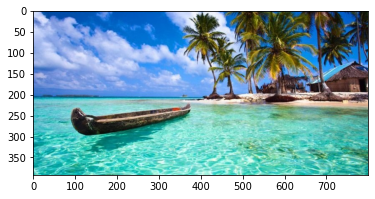

In [22]:
plt.imshow(img2)
plt.show()

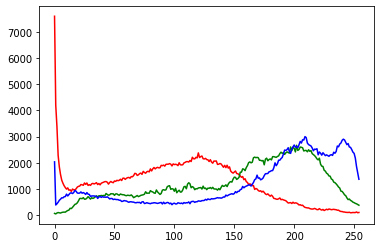

In [ ]:
#Histograma de la imagen
for i,col in enumerate(["r","g","b"]):
  histograma = cv2.calcHist([img2],[i],None,[255],[0,255]) #cv2.calcHist(images, channels, mask, histSize, ranges[hist[, accumulate]])
  plt.plot(histograma, color=col)
plt.show()

In [ ]:
img.shape

(300, 400, 3)

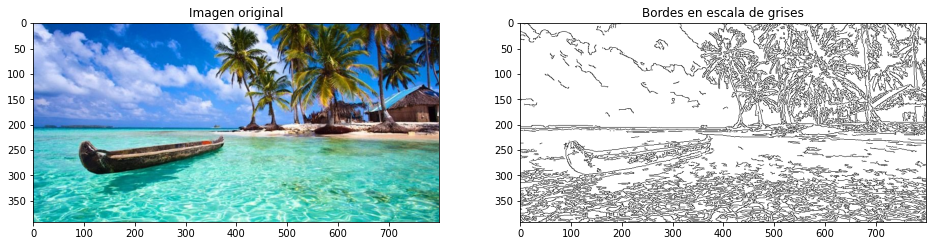

In [ ]:
#Detección de bordes

plt.figure(figsize=(16, 16))

#Canny 
edges = cv2.Canny(img2, 100,200)

plt.subplot(121), plt.imshow(img2)
plt.title('Imagen original')
plt.subplot(122), plt.imshow(edges, cmap="binary")
plt.title('Bordes en escala de grises')
plt.show()

1.      Carga una imagen a color.
2.      Divide la imagen por capas (R, G, B) y muestra cada capa.
3.      Obtén el color magenta, amarillo y cian, haciendo uso de la combinación de las capas anteriores.
4.      Convierte la imagen a escala de grises.
5.      Reduce la escala de la imagen para obtener una imagen de 28x28 pixeles.
6.      Muestra el histograma de la imagen.
7.      Agrega una segunda imagen, haz la suma la nueva imagen con la anterior y muestra la imagen resultante.
8.      Aplica la función canny para la detección de bordes a la primera imagen

1.Carga una imagen a color.

In [4]:
image = cv2.imread('/Users/rociocuestapedraz/Desktop/Unicornio.jpg')
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

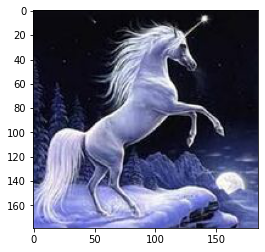

In [6]:
plt.imshow(img)
plt.show()

2.Divide la imagen por capas (R, G, B) y muestra cada capa.

In [7]:
r = img.copy()
# rojos
r[:, :, 1] = 0
r[:, :, 2] = 0


g = img.copy()
# verdes
g[:, :, 0] = 0
g[:, :, 2] = 0

b = img.copy()
# azules
b[:, :, 0] = 0
b[:, :, 1] = 0

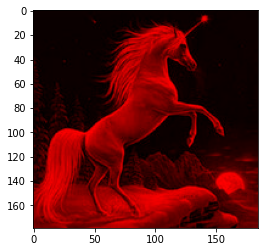

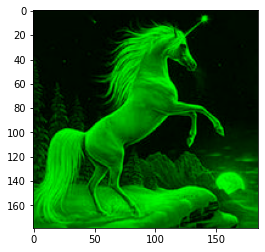

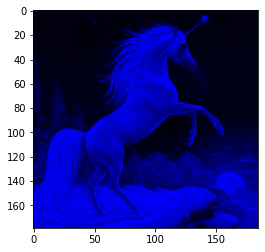

In [10]:
for i in [r,g,b]:
    plt.imshow(i)
    plt.show()

3. Obtén el color magenta, amarillo y cian, haciendo uso de la combinación de las capas anteriores.

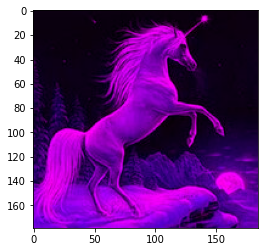

In [22]:
magenta=r+b
plt.imshow(magenta)
plt.show()

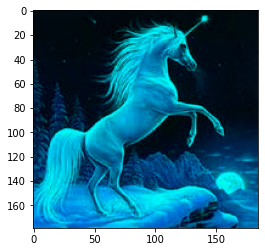

In [23]:
cian=g+b
plt.imshow(cian)
plt.show()

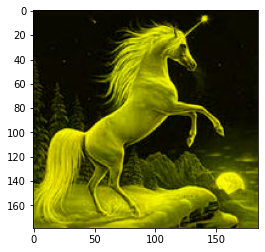

In [24]:
amarillo=r+g
plt.imshow(amarillo)
plt.show()

4. Convierte la imagen a escala de grises.

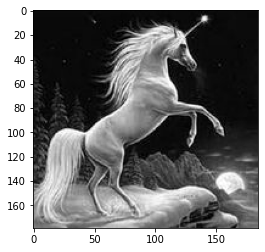

In [25]:
# Obtener los tres canales de la imagen
r,g,b = cv2.split(img,)
plt.imshow(g, cmap="gray")

5. Reduce la escala de la imagen para obtener una imagen de 28x28 pixeles.

Dimensiones :  (28, 29, 3)


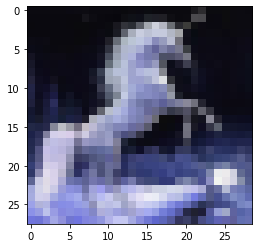

In [30]:
#Reducir escala

escala = 16 # reducir al 10 porciento la imagen original 
width = int(img.shape[1] * escala / 100)
height = int(img.shape[0] * escala / 100)
dim = (width, height)
reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Dimensiones : ',reduccion.shape)
 
plt.imshow(reduccion)
plt.show()

6. Muestra el histograma de la imagen.

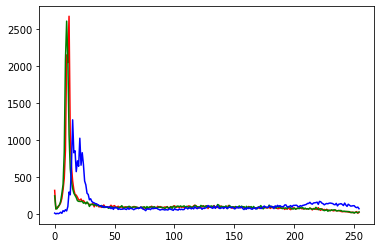

In [32]:
#Histograma de la imagen
for i,col in enumerate(["r","g","b"]):
  histograma = cv2.calcHist([img],[i],None,[255],[0,255]) #cv2.calcHist(images, channels, mask, histSize, ranges[hist[, accumulate]])
  plt.plot(histograma, color=col)
plt.show()

7.Agrega una segunda imagen, haz la suma la nueva imagen con la anterior y muestra la imagen resultante.

In [33]:
image = cv2.imread('/Users/rociocuestapedraz/Desktop/Unicornio 2.jpg')
img2 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

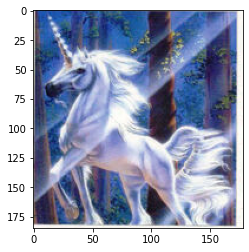

In [34]:
plt.imshow(img2)
plt.show()

In [38]:
img.shape

(179, 185, 3)

In [52]:
width = 185
height = 179
dim = (width, height)
reduccion = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
 
print('Dimensiones : ',reduccion.shape)
 
img2.shape

Dimensiones :  (179, 185, 3)


(185, 178, 3)

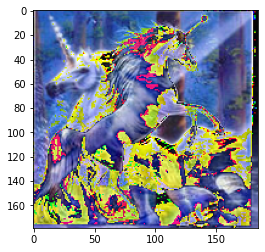

In [53]:
mezcla=reduccion+img
plt.imshow(mezcla)
plt.show()

8. Aplica la función canny para la detección de bordes a la primera imagen

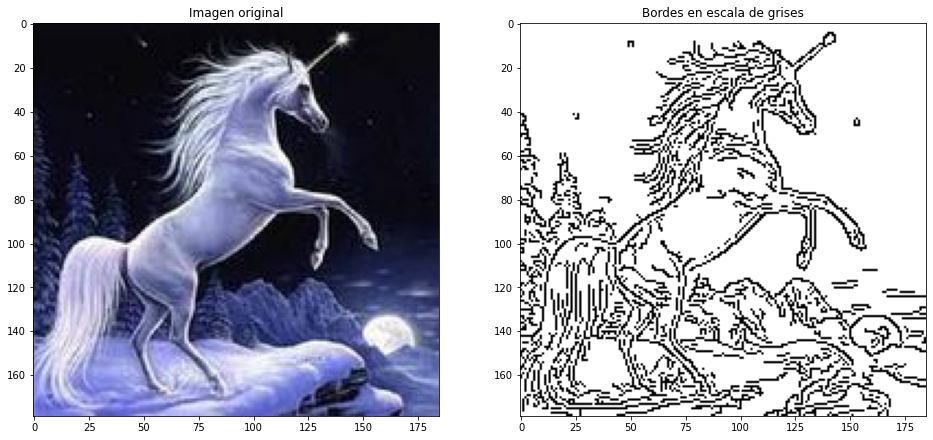

In [51]:
#Detección de bordes

plt.figure(figsize=(16, 16))

#Canny 
edges = cv2.Canny(img, 100,200)

plt.subplot(121), plt.imshow(img)
plt.title('Imagen original')
plt.subplot(122), plt.imshow(edges, cmap="binary")
plt.title('Bordes en escala de grises')
plt.show()